# Breast Cancer Coimbra - classification problem

## Decision tree implementation


Data Set Information:

There are 10 predictors, all quantitative, and a binary dependent variable, indicating the presence or absence of breast cancer.
The predictors are anthropometric data and parameters which can be gathered in routine blood analysis.
Prediction models based on these predictors, if accurate, can potentially be used as a biomarker of breast cancer.

### Attribute Information:

Quantitative Attributes:
- Age (years)
- BMI (kg/m2)
- Glucose (mg/dL)
- Insulin (µU/mL)
- HOMA
- Leptin (ng/mL)
- Adiponectin (µg/mL)
- Resistin (ng/mL)
- MCP-1(pg/dL)

Labels:
1=Healthy controls
2=Patients

Link: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra

In [59]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [184]:
# Import dataset
df = pd.read_csv('dataR2.csv')
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [186]:
# Importing sklearn libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

### Data validation and cleaning

In [187]:
df.isnull().sum()

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

Looks like we don't have any missing values

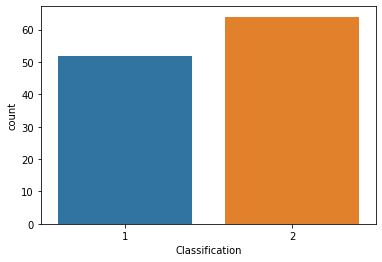

In [188]:
sns.countplot(x='Classification', data=df)

Our dataset is balanced

## Decision tree model train/test split

In [189]:
# Split the data into train and test set

X = df.iloc[:,:-1]
y = df['Classification']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52)

## Baseline Decision Tree (default parameters)


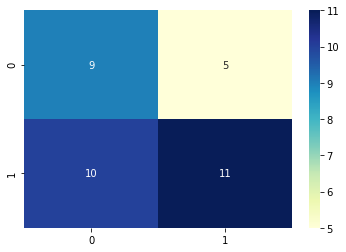

In [190]:
tree_base = DecisionTreeClassifier()
tree_base.fit(X_train, y_train)

predictions = tree_base.predict(X_test)
cm = confusion_matrix(y_test, predictions)

sns.heatmap(cm,annot=True, cmap="YlGnBu", fmt="d")

In [191]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           1       0.64      0.47      0.55        19
           2       0.52      0.69      0.59        16

    accuracy                           0.57        35
   macro avg       0.58      0.58      0.57        35
weighted avg       0.59      0.57      0.57        35



### Tuning hyperparameters with GridSearchCV

In [212]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier()
pipe = Pipeline(steps=[('dec_tree', tree)])

parameters={'criterion':['gini', 'entropy'],'min_samples_split': range(10,500,20),'min_samples_leaf':[1, 5, 10, 20, 50, 100],
            'max_depth': range(1,20,2)}

In [213]:
clf= GridSearchCV(tree_base,parameters)
clf.fit(X_train,y_train)

print(); print(clf.best_params_) 


{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 20, 'min_samples_split': 10}


Not sure why but GridSearch did not provide best parameters for optimal model, so I tuned it manually

In [222]:
tree_v2 = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=20, min_samples_leaf=10)

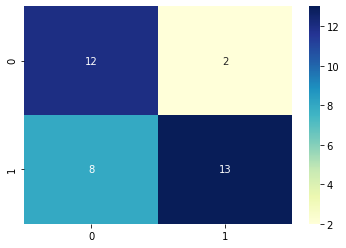

In [225]:
tree_v2.fit(X_train, y_train)

predictions = tree_v2.predict(X_test)
cm = confusion_matrix(y_test, predictions)

sns.heatmap(cm,annot=True, cmap="YlGnBu", fmt="d")

In [226]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           1       0.86      0.60      0.71        20
           2       0.62      0.87      0.72        15

    accuracy                           0.71        35
   macro avg       0.74      0.73      0.71        35
weighted avg       0.76      0.71      0.71        35



### Base model accuracy overall was 57%
### Tuned model accuracy overall was 71%

## Using KFolds cross-validation with the optimal model

In [227]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

In [228]:
# prepare the cross-validation procedure
k = 5
cv = KFold(n_splits=k, random_state=10, shuffle=True)

# evaluate model
scores = cross_val_score(tree_v2, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.706 (0.102)


In [229]:
# evaluate model
scores = cross_val_score(tree_base, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.724 (0.115)


## Conclusion 

Cross-validation with base model performed better than cross-validation with optimal model (tree_v2)